# Data analysis project

### For this project I used a NBA dataset from Kaggle, it contains statistics of all players for all teams along 21 seasons

## First look and EDA

In [269]:
import pandas as pd 
import os
path = os.getcwd()

In [673]:
df = pd.read_csv(path + '\\all_seasons.csv')

In [865]:
df.country.value_counts() #there is already a column we can drop, unnamed

country
USA                    10721
Canada                   205
France                   190
Australia                100
Spain                     93
                       ...  
Ghana                      1
Trinidad and Tobago        1
Denmark                    1
Colombia                   1
Sudan (UK)                 1
Name: count, Length: 82, dtype: int64

In [674]:
df = df.drop(columns='Unnamed: 0')

In [683]:
df['rank_pts'] = df.groupby('season')['pts'].rank(ascending=False)

In [686]:
df['rank_ast'] = df.groupby('season')['ast'].rank(ascending=False)
df['rank_reb'] = df.groupby('season')['reb'].rank(ascending=False)

In [273]:
df.loc[df.team_abbreviation == 'POR']['season'].unique()#all teams should have the whole team for each season

array(['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02',
       '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21', '2021-22', '2022-23'], dtype=object)

### Create a wordcloud with the countries that have more NBA players (excluding USA)

In [275]:
df.country.unique() # we could do a map word thing
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [276]:
#need the text first, 
#wc.generate(df.Name[df.Genre == i].to_string())
#text = " ".join(review for review in df.country) USA included

text = " ".join(review for review in df.loc[df.country != 'USA']['country']) #Usa excluded
wordcloud = WordCloud().generate(text)

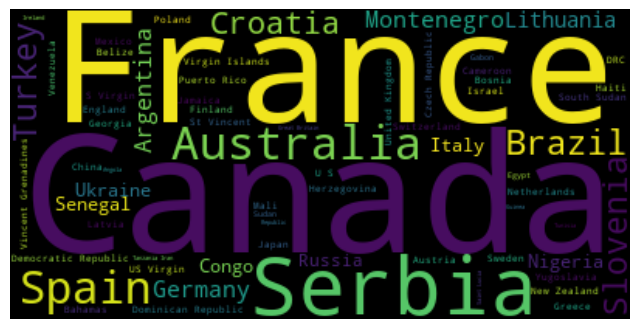

In [886]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordsoup.png', transparent = True, dpi = 300) #save with transparent background

plt.show()

### I have decided that my angle for this project is to focus on two main groups: USA players vs Non-Usa

- I will try to make some comparisons along the years and see if I can find interesting differences or similarities

In [675]:
# lets see how much more prevalent is USA and if that has been changing over the years
#make a new column that says USA or Other:
df['origin'] = df.country.apply(lambda x: 'USA' if x == 'USA' else 'Other')

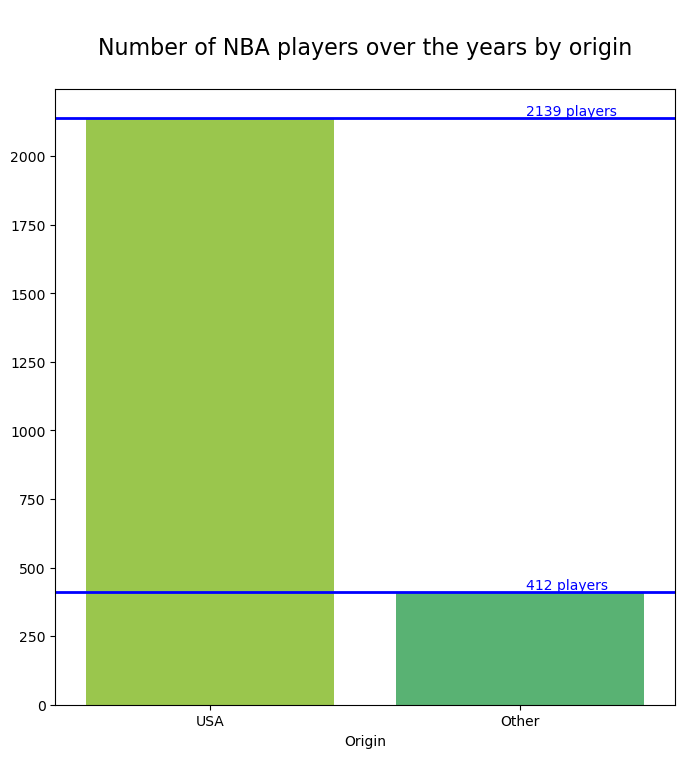

In [948]:
#df_no_duplicates = df.drop_duplicates(subset='player_name')
plt.figure(figsize = (8,8))
sns.set_palette('viridis_r')
sns.countplot(data = df_no_duplicates, x = 'origin')

line_positions = [2139, 412]  # Adjust these positions as needed

for position in line_positions:
    plt.axhline(y=position, color='blue', linestyle='-', linewidth=2)
    plt.text(1.02, position, f'{position} players', color='blue', va='bottom')

plt.title('\nNumber of NBA players over the years by origin\n', fontsize = 16)
plt.ylabel('', fontsize = 14)
plt.xlabel('Origin', fontsize = 10)
plt.savefig('origin_players.png', dpi = 300) #save with transparent background


# has the trend changed over the years?
plt.show()

In [944]:
# I need to compare the number of players each year over the years to make some sort of line plot.
# maybe change the df to have some dateindex instead? although it would be repeating, but maybe good to make the column datetime
df.groupby('player_name').age.count()
df_no_duplicates.groupby('origin').age.count()

origin
Other     412
USA      2139
Name: age, dtype: int64

<Axes: xlabel='season'>

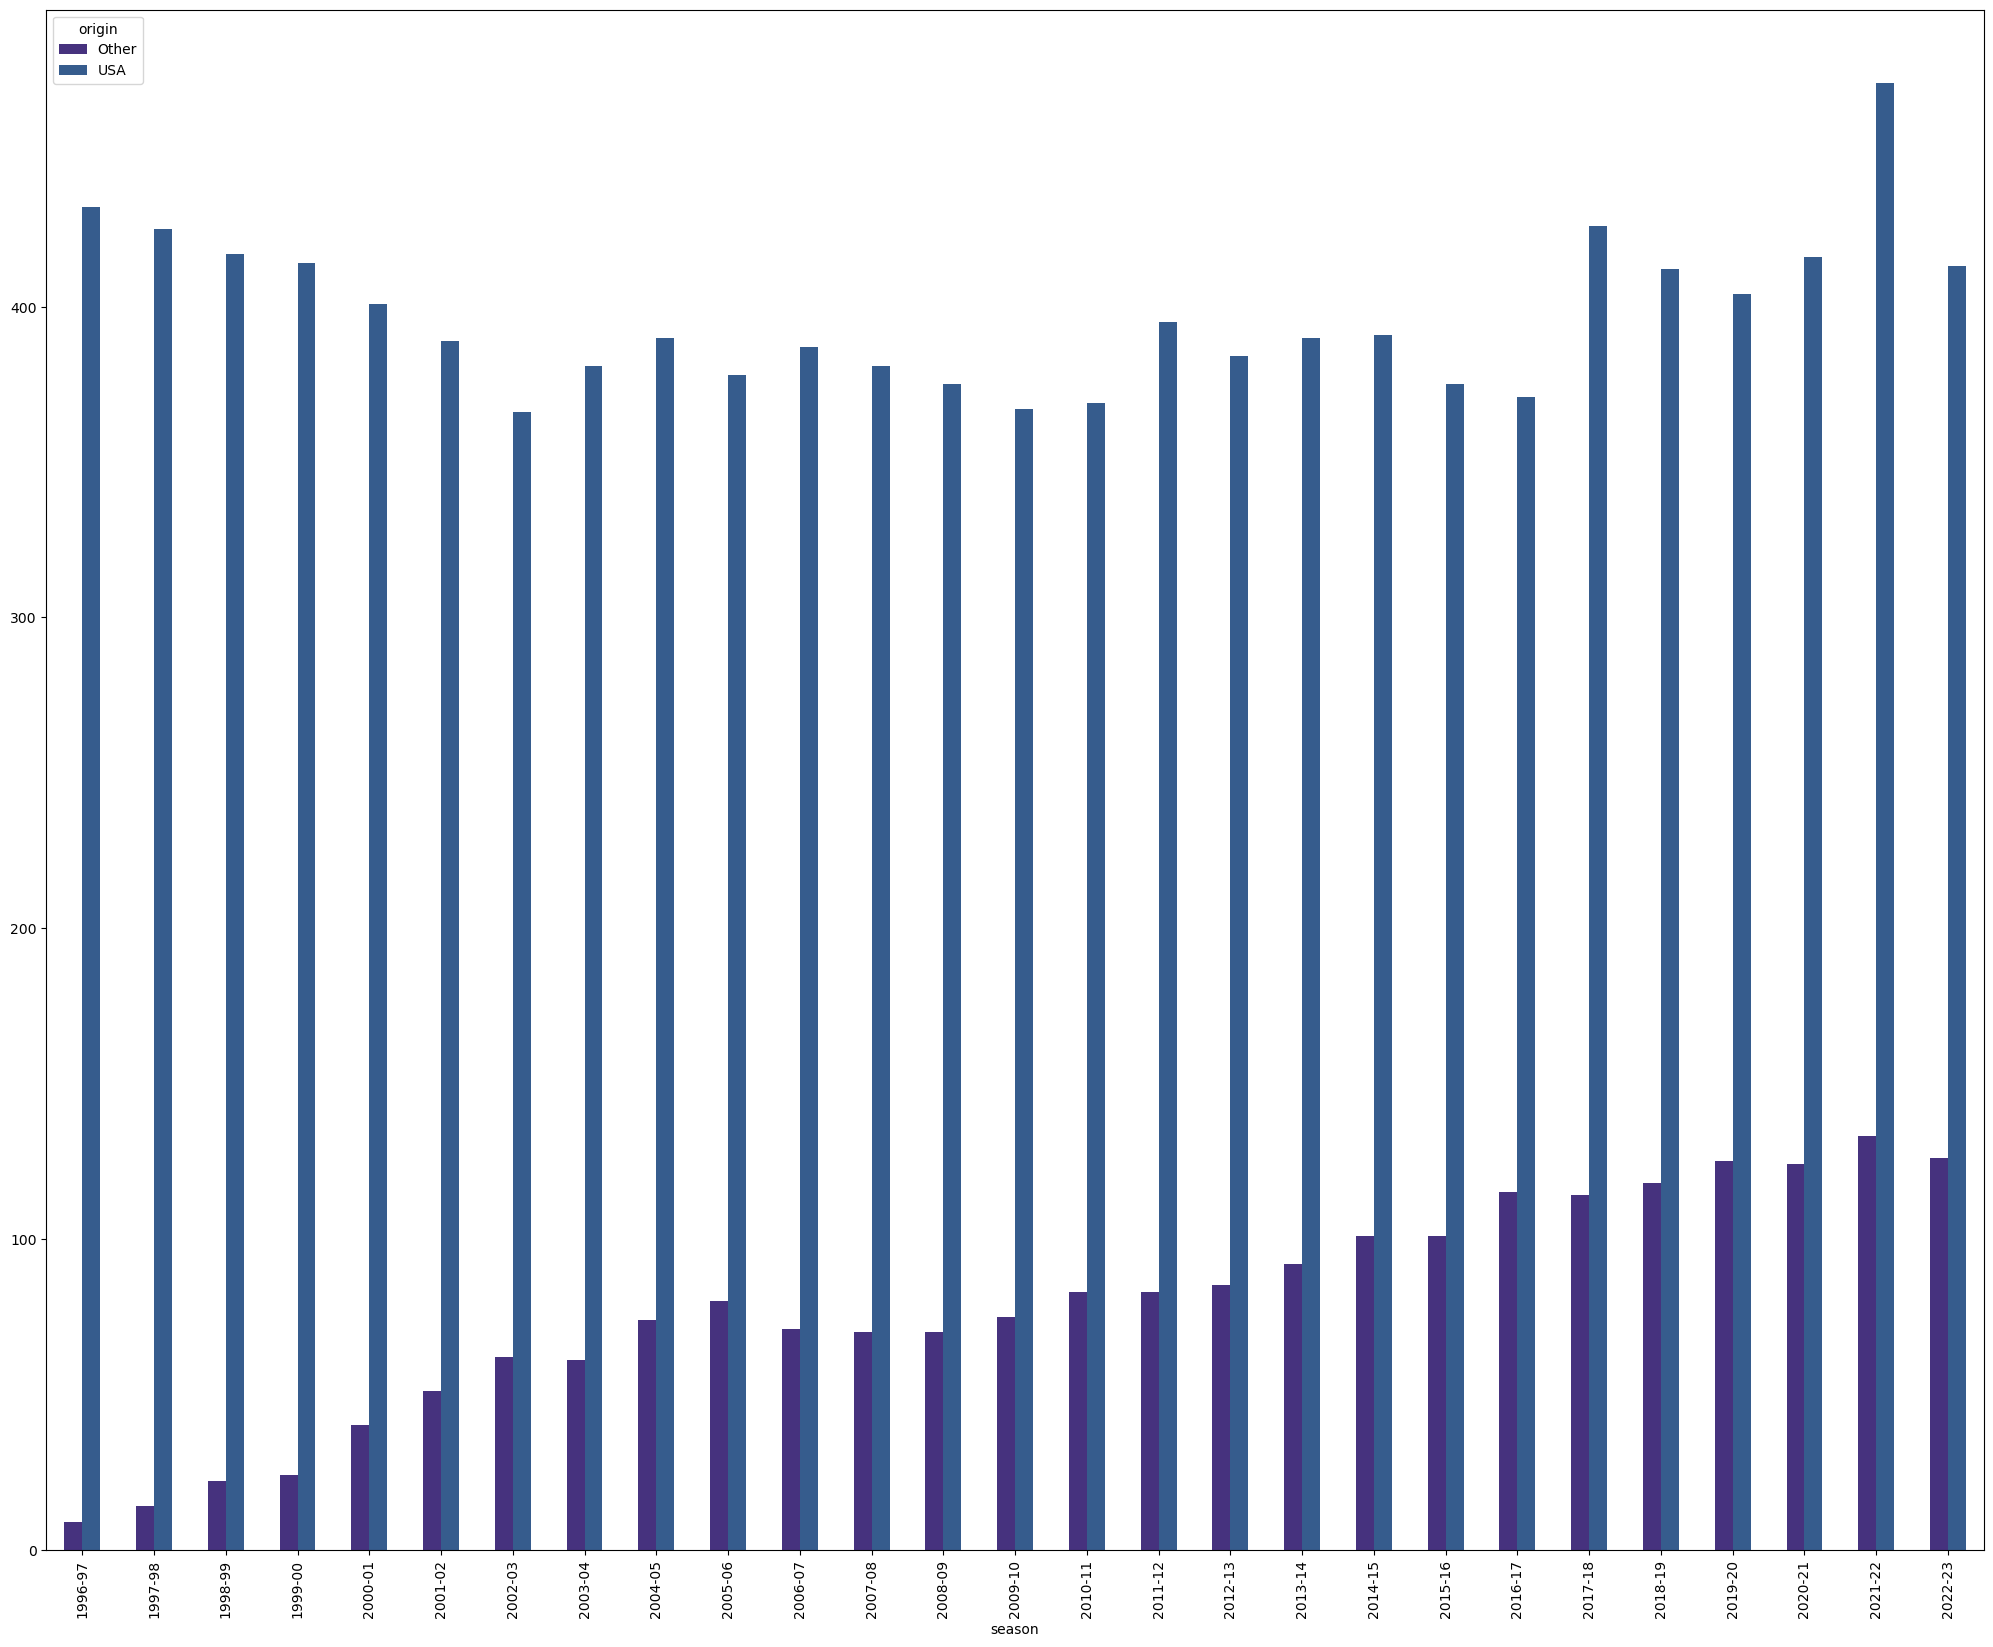

In [357]:

df.groupby(['season', 'origin']).player_name.count().unstack().plot.bar() # we see a nice trend I like this one, we can
#def make it prettier

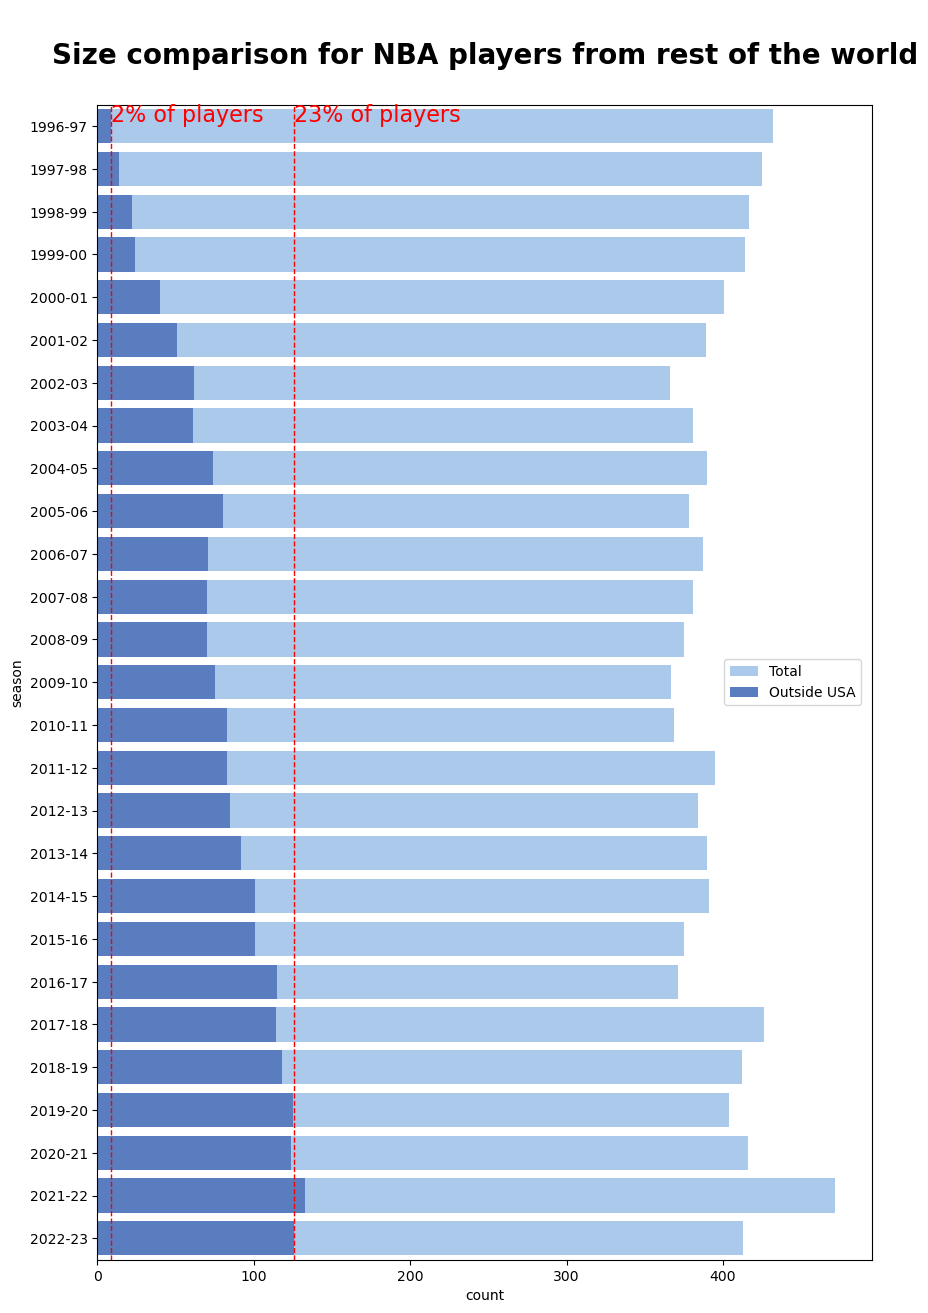

In [938]:
f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.countplot(y="season", data=df.loc[df.origin == 'USA'],
            label="Total", color="b")
sns.set_color_codes("muted")
sns.countplot(y="season", data=df.loc[df.origin == 'Other'],
            label="Outside USA", color="b")
# Draw vertical lines and add labels
line_positions = [9,126 ]  # Adjust these positions as needed
line_labels = ['2% of players', '23% of players']  # Labels for the lines

for position, label in zip(line_positions, line_labels):
    ax.axvline(x=position, color='red', linestyle='--', linewidth=1)
    ax.text(position, ax.get_ylim()[1] + 0.5, label,
            ha='left', va='bottom', fontsize=16, color='red')

ax.legend(loc='center left', bbox_to_anchor=(.8, 0.5))
ax.set_title('\nSize comparison for NBA players from rest of the world\n', fontsize = 20, fontweight = 'bold')
plt.savefig('amount_players.png',  dpi = 300) #save with transparent background
plt.show()
#This could look ok I guess..lets keep going

In [283]:
#lets compare other stats for USA vs rest of the world!
df.loc[df.origin == 'Other'].player_height.mean()
df.loc[df.origin == 'USA'].player_height.mean()
#lets make the combined mean height over the years and also separated by USA vs Other

199.58049062587446

<Axes: >

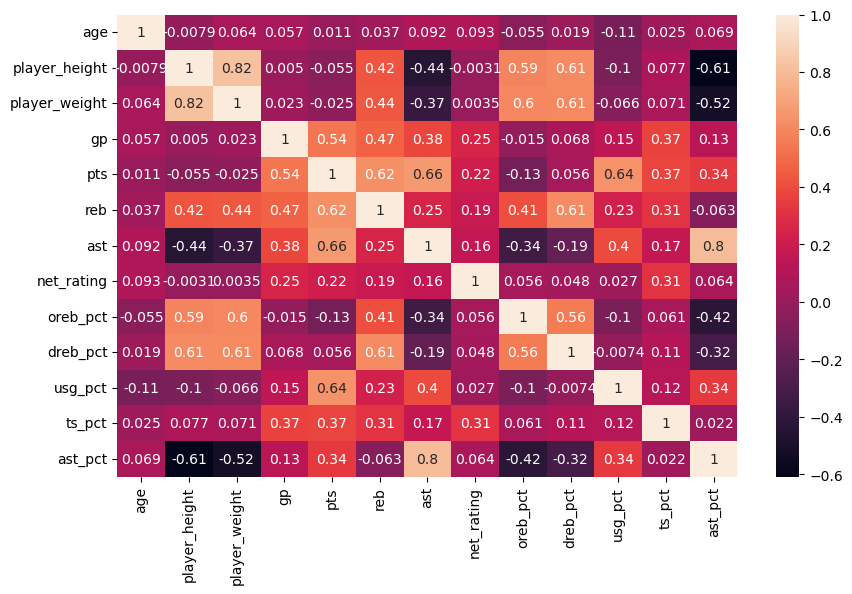

In [284]:
# but first lets check correlations
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [1]:
#probably not enough to make a case here...


### Using the two groups I will compare the avg points, reb and assists over the years

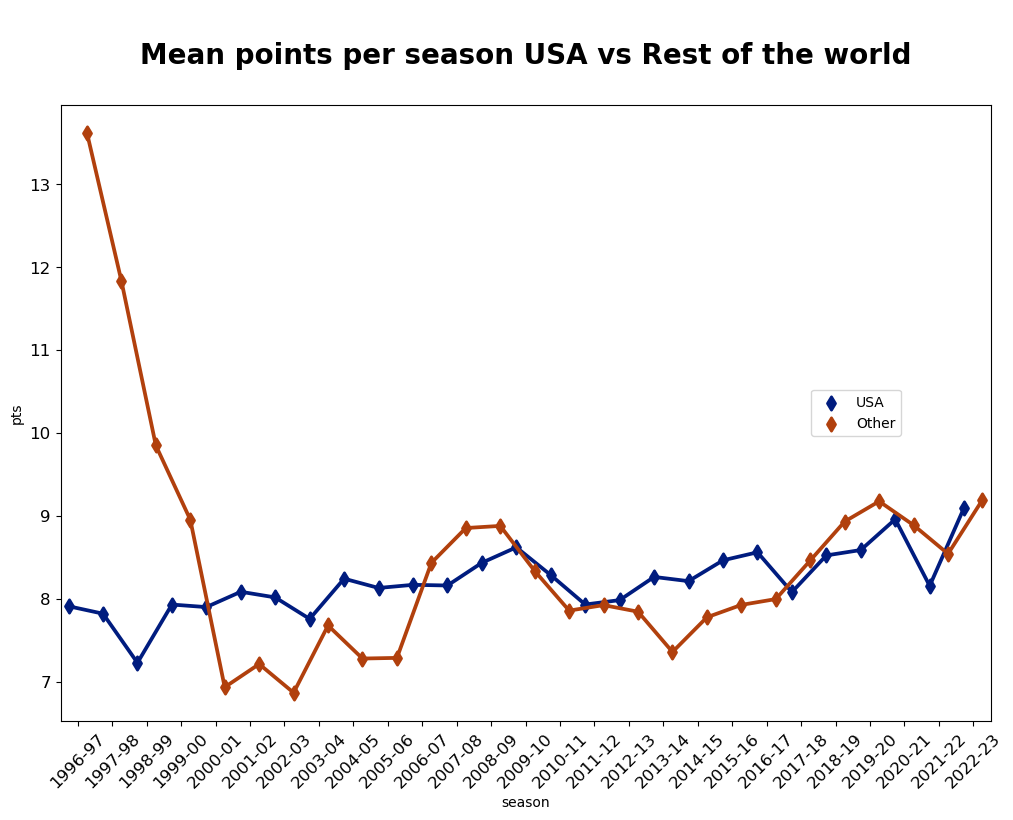

In [961]:
plt.figure(figsize = (12,8))
sns.set_palette('viridis_r')
sns.pointplot(
    data=df, x="season", y="pts", hue="origin",
    dodge=.8 - .8 / 3, palette="dark", errorbar=None,
    markers="d",  
)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks( fontsize = 12)

plt.legend(loc='center left', bbox_to_anchor=(.8, 0.5))
plt.title('\nMean points per season USA vs Rest of the world\n', fontsize = 20, fontweight = 'bold')
plt.savefig('mean_pts.png',  dpi = 300) #save with transparent background
plt.show()

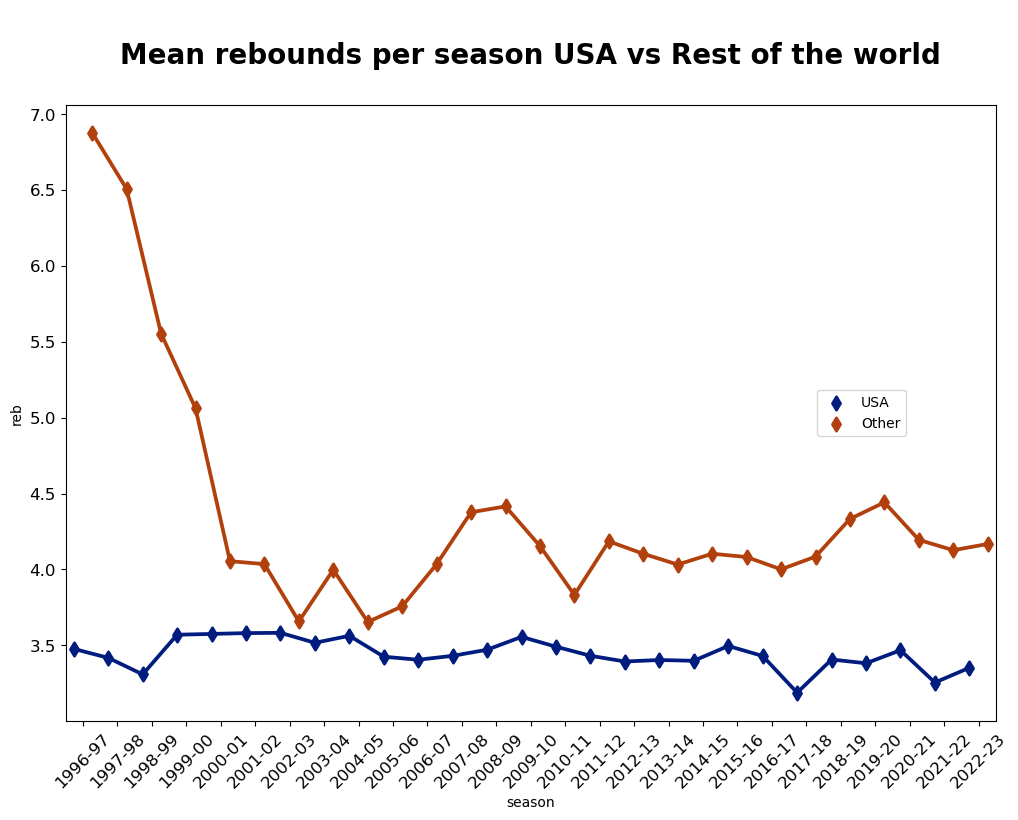

In [962]:

plt.figure(figsize = (12,8))
sns.set_palette('viridis_r')
sns.pointplot(
    data=df, x="season", y="reb", hue="origin",
    dodge=.8 - .8 / 3, palette="dark", errorbar=None,
    markers="d",  
)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks( fontsize = 12)

plt.legend(loc='center left', bbox_to_anchor=(.8, 0.5))
plt.title('\nMean rebounds per season USA vs Rest of the world\n', fontsize = 20, fontweight = 'bold')
plt.savefig('mean_reb.png',  dpi = 300) #save with transparent background
plt.show()

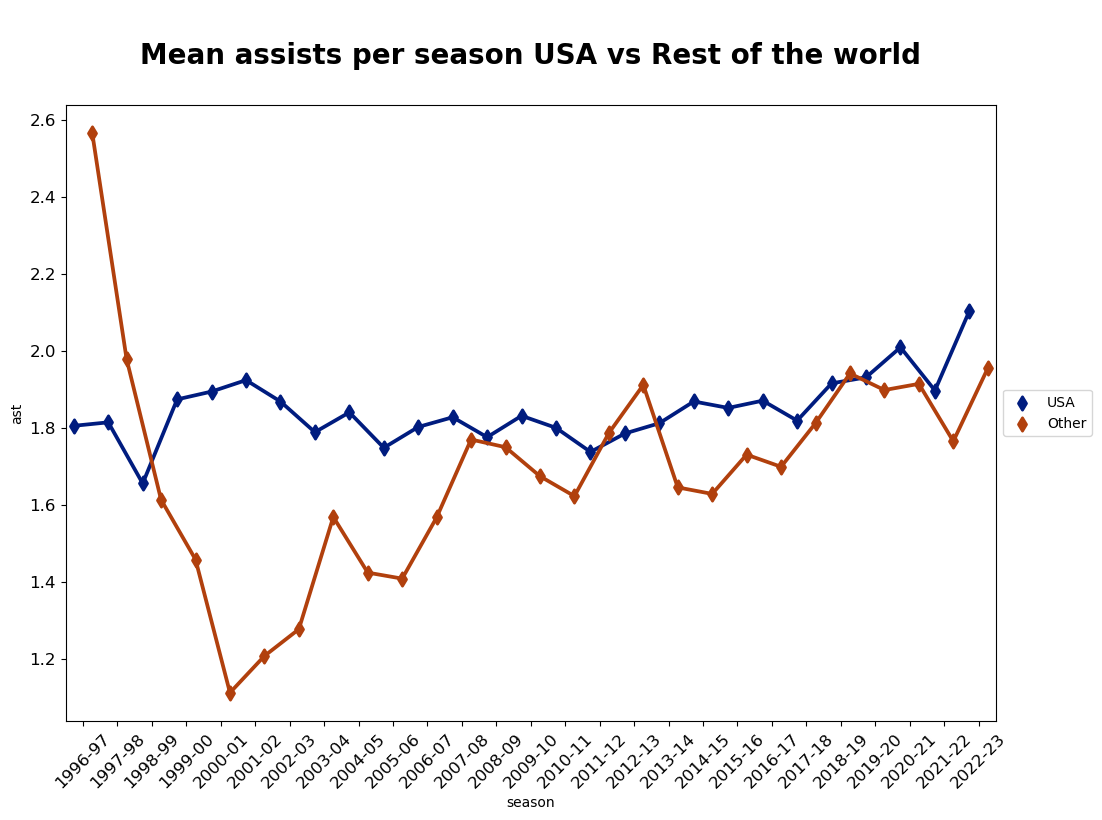

In [963]:

plt.figure(figsize = (12,8))
sns.set_palette('viridis_r')
sns.pointplot(
    data=df, x="season", y="ast", hue="origin",
    dodge=.8 - .8 / 3, palette="dark", errorbar=None,
    markers="d",  
)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks( fontsize = 12)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('\nMean assists per season USA vs Rest of the world\n', fontsize = 20, fontweight = 'bold')
plt.savefig('mean_ast.png',  dpi = 300) #save with transparent background
plt.show()

In [554]:
#there seems to be a trend, the first years of this graph the people comming into the NBA from outside was above avg
# The horizontal plot is made using the hline function


<Axes: xlabel='team_abbreviation', ylabel='season'>

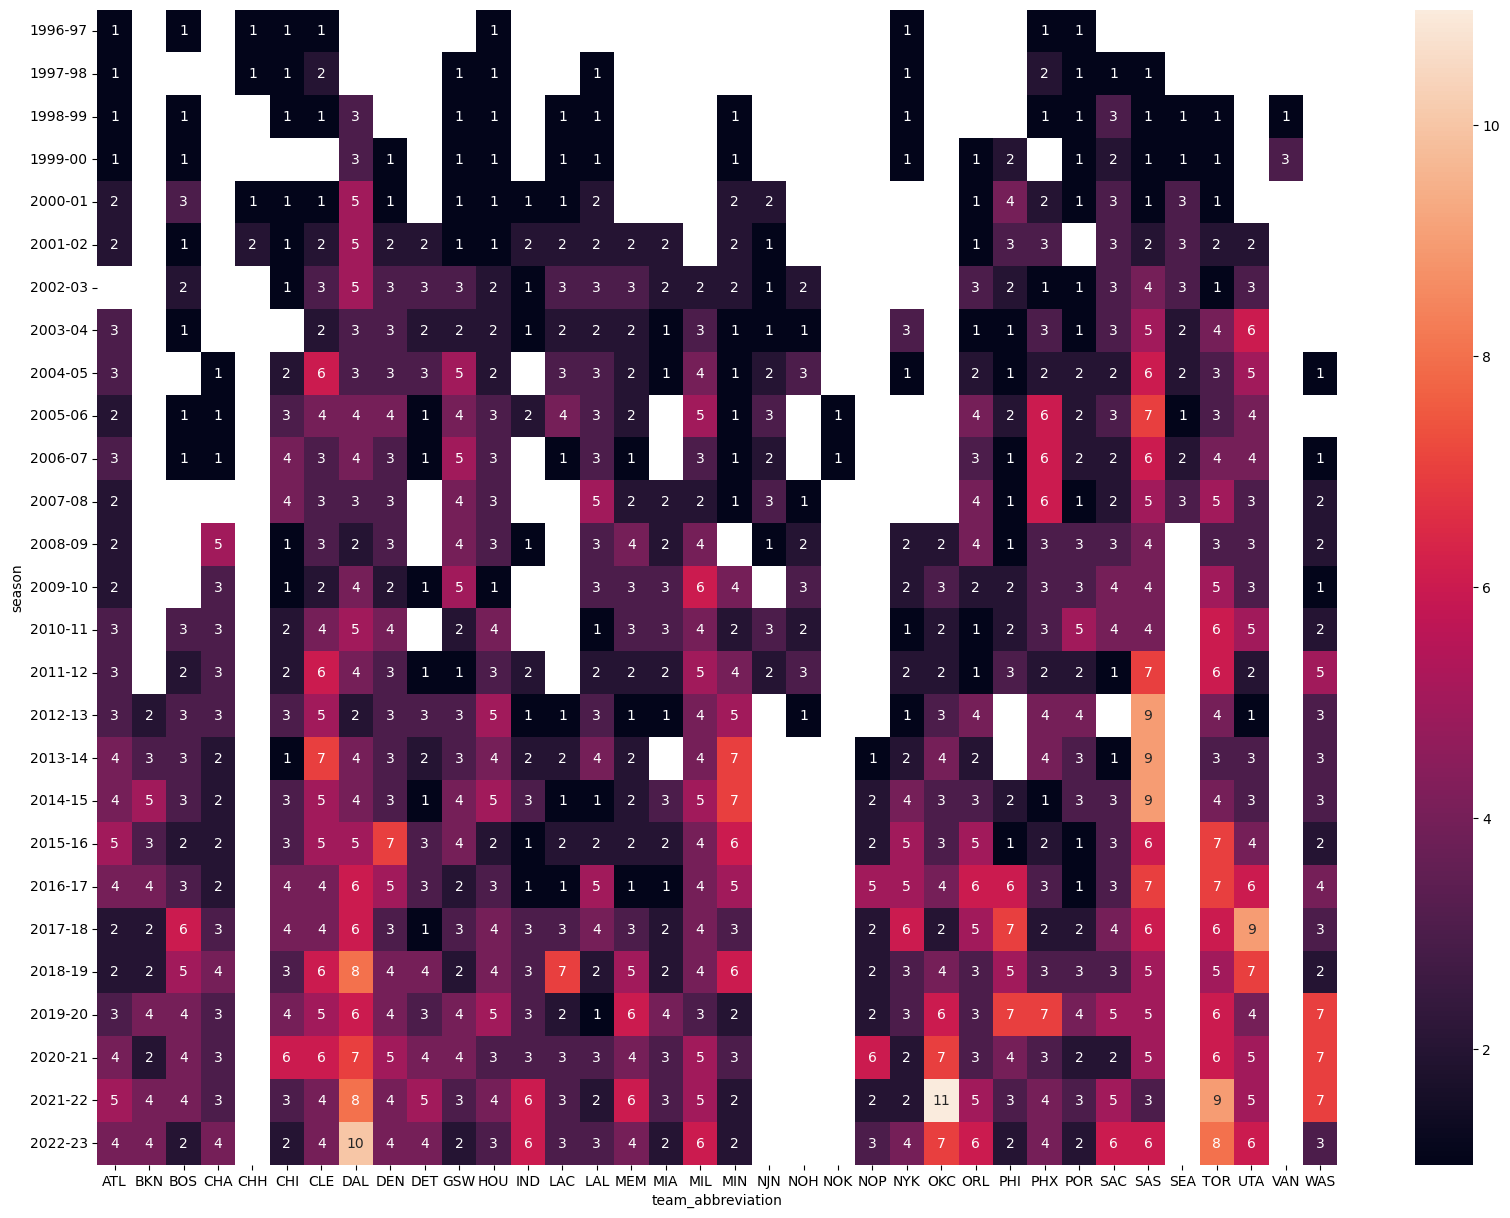

In [303]:
#which teams had the most players from outside USA?
plt.figure(figsize = (20,15))
sns.heatmap(df.loc[df.origin == 'Other'].groupby(['season', 'team_abbreviation']).player_name.count().unstack(), annot=True)
#plt.legend(fontsize = 10, bbox_to_anchor = (2,1), loc = 'upper left')


In [337]:
df_teams_origin = df.loc[df.origin == 'Other'].groupby(['season', 'team_abbreviation']).player_name.count().unstack()
#I need to add 0 here I think

In [338]:
import numpy as np
df_teams_origin = df_teams_origin.replace(np.nan, 0)

In [301]:
#its gonna be tricky to visualise this in a good way
df_teams_USA = df.loc[df.origin == 'USA'].groupby(['season', 'team_abbreviation']).player_name.count().unstack()


### Using a library geopy to make a world map with all the countries that have NBA players

In [305]:
df.loc[df.country != 'USA']['country'].unique()

array(['Nigeria', 'Congo', 'Canada', 'Serbia and Montenegro', 'Ukraine',
       'Croatia', 'Jamaica', 'Lithuania', 'Slovenia', 'US Virgin Islands',
       'France', 'St. Vincent & Grenadines', 'Germany',
       'Dominican Republic', 'New Zealand', 'Georgia', 'Belize',
       'England', 'Turkey', 'Greece', 'Finland', 'Senegal', 'Mexico',
       'Puerto Rico', 'China', 'Argentina', 'Mali', 'U.S. Virgin Islands',
       'Yugoslavia', 'Spain', 'Venezuela', 'Serbia', 'Haiti', 'Russia',
       'Brazil', 'Ireland', 'Scotland', 'Poland', 'Netherlands',
       'Czech Republic', 'Montenegro', 'United Kingdom',
       'Democratic Republic of the Congo', 'Latvia', 'South Korea',
       'USSR', 'Australia', 'Uruguay', 'Sudan (UK)', 'Italy',
       'Switzerland', 'Gabon', 'Cameroon', 'Iran', 'Israel', 'Tanzania',
       'Sweden', 'Panama', 'Great Britain', 'Bosnia', 'Macedonia',
       'Bosnia & Herzegovina', 'Cabo Verde', 'Tunisia', 'South Sudan',
       'Bahamas', 'Ghana', 'Austria', 'Bosnia and H

In [306]:
#!pip install geopy
from geopy.geocoders import Nominatim

countries = ['Nigeria', 'Congo', 'Canada', 'Serbia and Montenegro', 'Ukraine',
             'Croatia', 'Jamaica', 'Lithuania', 'Slovenia', 'US Virgin Islands',
             'France', 'St. Vincent & Grenadines', 'Germany',
             'Dominican Republic', 'New Zealand', 'Georgia', 'Belize',
             'England', 'Turkey', 'Greece', 'Finland', 'Senegal', 'Mexico',
             'Puerto Rico', 'China', 'Argentina', 'Mali', 'U.S. Virgin Islands',
             'Yugoslavia', 'Spain', 'Venezuela', 'Serbia', 'Haiti', 'Russia',
             'Brazil', 'Ireland', 'Scotland', 'Poland', 'Netherlands',
             'Czech Republic', 'Montenegro', 'United Kingdom',
             'Democratic Republic of the Congo', 'Latvia', 'South Korea',
             'USSR', 'Australia', 'Uruguay', 'Sudan (UK)', 'Italy',
             'Switzerland', 'Gabon', 'Cameroon', 'Iran', 'Israel', 'Tanzania',
             'Sweden', 'Panama', 'Great Britain', 'Bosnia', 'Macedonia',
             'Bosnia & Herzegovina', 'Cabo Verde', 'Tunisia', 'South Sudan',
             'Bahamas', 'Ghana', 'Austria', 'Bosnia and Herzegovina', 'Egypt',
             'Trinidad and Tobago', 'Japan', 'Angola', 'Saint Lucia', 'Sudan',
             'DRC', 'Republic of the Congo', 'Guinea', 'Denmark', 'Colombia',
             'Portugal']

# Initialize geocoder
geolocator = Nominatim(user_agent="geoapi")

# Get latitude and longitude for each country
latitudes = []
longitudes = []

for country in countries:
    location = geolocator.geocode(country)
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(None)
        longitudes.append(None)

In [307]:
countries_dict = {'countries':countries, 'lon': longitudes, 'lat': latitudes}
df_countries = pd.DataFrame(countries_dict, columns = ['countries', 'lon', 'lat'])
df_countries

,countries,lon,lat
0,Nigeria,7.999972,9.600036
1,Congo,23.822264,-2.981434
2,Canada,-107.991707,61.066692
3,Serbia and Montenegro,20.287765,44.819389
4,Ukraine,31.271832,49.487197
...,...,...,...
76,Republic of the Congo,15.641915,-0.726433
77,Guinea,-10.708359,10.722623
78,Denmark,10.333328,55.670249
79,Colombia,-72.908813,4.099917


In [308]:
location = geolocator.geocode('USA')

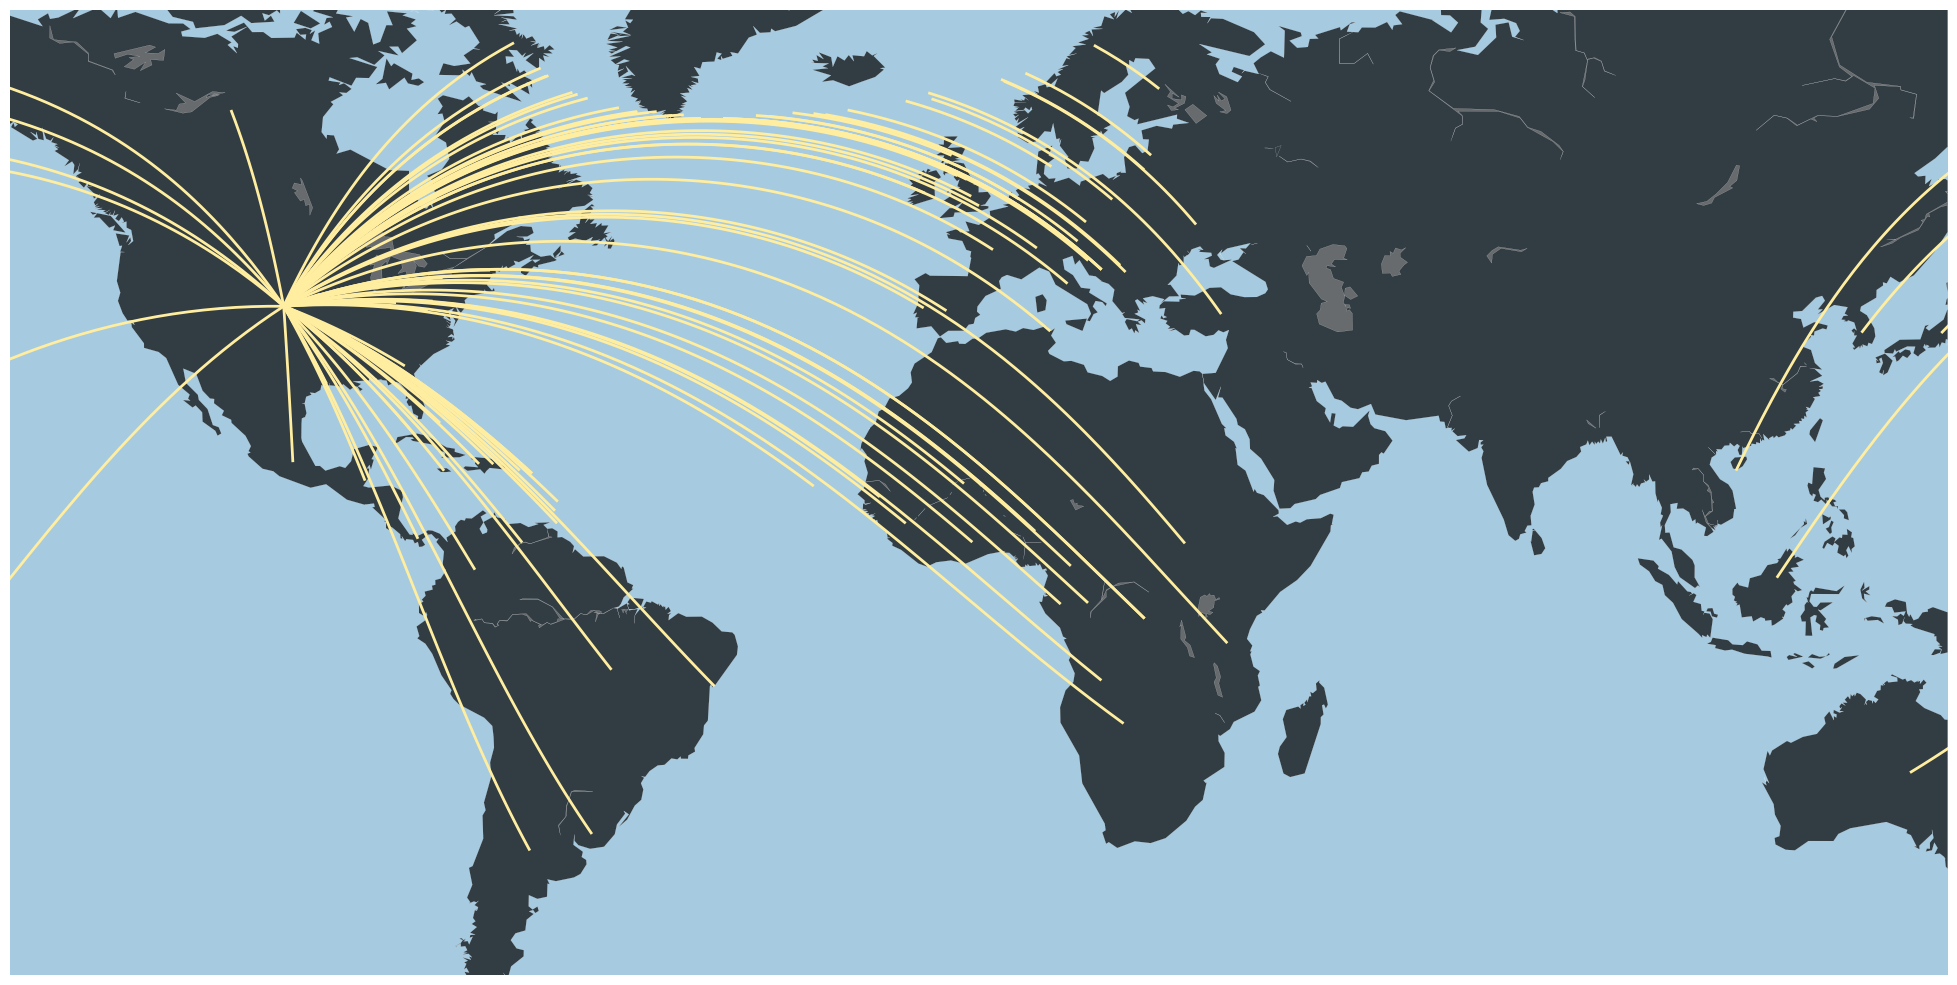

In [949]:
# libraries
#!pip install basemap
#from mpl_toolkits.basemap import Basemap
#import numpy as np
#import matplotlib.pyplot as plt

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=25,20

# Background map
#m=Basemap(llcrnrlon=-100, llcrnrlat=20, urcrnrlon=30, urcrnrlat=70, projection='merc')
m = Basemap(llcrnrlon=-140, llcrnrlat=-50, urcrnrlon=140, urcrnrlat=70, projection='mill')

m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 # Loop on every pair of cities to add the connection
for startIndex, startRow in df_countries.iterrows(): 
    m.drawgreatcircle(startRow.lon, startRow.lat, location.longitude, location.latitude, linewidth=2, color='#ffeda0');
plt.savefig('nba_world.png', dpi = 300, transparent = True,) #save with transparent background

### Now I use the same library to mark the NBA teams that have non-USA players

In [234]:
cities = ['Houston, USA', 'Washington, USA', 'Vancouver, USA', 'Los Angeles, USA', 'Denver, USA', 'Orlando, USA', 'Charlotte, USA', 'Milwaukee, USA', 'Detroit, USA', 'Portland, USA', 'Dallas, USA', 'Salt Lake City, USA', 'Seattle, USA', 'Boston, USA', 'Indianapolis, USA', 'San Antonio, USA', 'Miami, USA', 'Atlanta, USA', 'New Jersey, USA', 'Los Angeles, USA', 'San Francisco, USA', 'Philadelphia, USA', 'New York, USA', 'Toronto, Canada', 'Phoenix, USA', 'Minneapolis, USA', 'Chicago, USA', 'Sacramento, USA', 'Cleveland, USA', 'Memphis, USA', 'New Orleans, USA', 'Charlotte, USA', 'New Orleans, USA', 'Oklahoma City, USA', 'Brooklyn, USA', 'New Orleans, USA']

In [310]:
cities

['Phoenix, USA',
 'Salt Lake City, USA',
 'Dallas, USA',
 'Sacramento, USA',
 'Memphis, USA',
 'Denver, USA',
 'San Antonio, USA',
 'San Francisco, USA',
 'New York, USA',
 'Orlando, USA',
 'Seattle, USA',
 'Minneapolis, USA',
 'Philadelphia, USA',
 'Milwaukee, USA',
 'Vancouver, USA',
 'Oklahoma City, USA',
 'Portland, USA',
 'New Orleans, USA',
 'New Jersey, USA',
 'Atlanta, USA',
 'Washington, USA',
 'Boston, USA',
 'Cleveland, USA',
 'Los Angeles, USA',
 'Toronto, Canada',
 'Indianapolis, USA',
 'Brooklyn, USA',
 'Charlotte, USA',
 'Houston, USA',
 'Detroit, USA',
 'Chicago, USA',
 'Miami, USA']

In [311]:
geolocator = Nominatim(user_agent="my_geocoder")

# Example cities in the USA


# Get coordinates for each city
coordinates = {"city": [], "lat": [], "lon": []}

for city in cities:
    city_location = geolocator.geocode(city)
    if location:
        coordinates["city"].append(city_location.address)
        coordinates["lat"].append(city_location.latitude)
        coordinates["lon"].append(city_location.longitude)

In [317]:
df_cities = pd.DataFrame(coordinates, columns = ['city', 'lat', 'lon'])
df_cities['n'] = 1

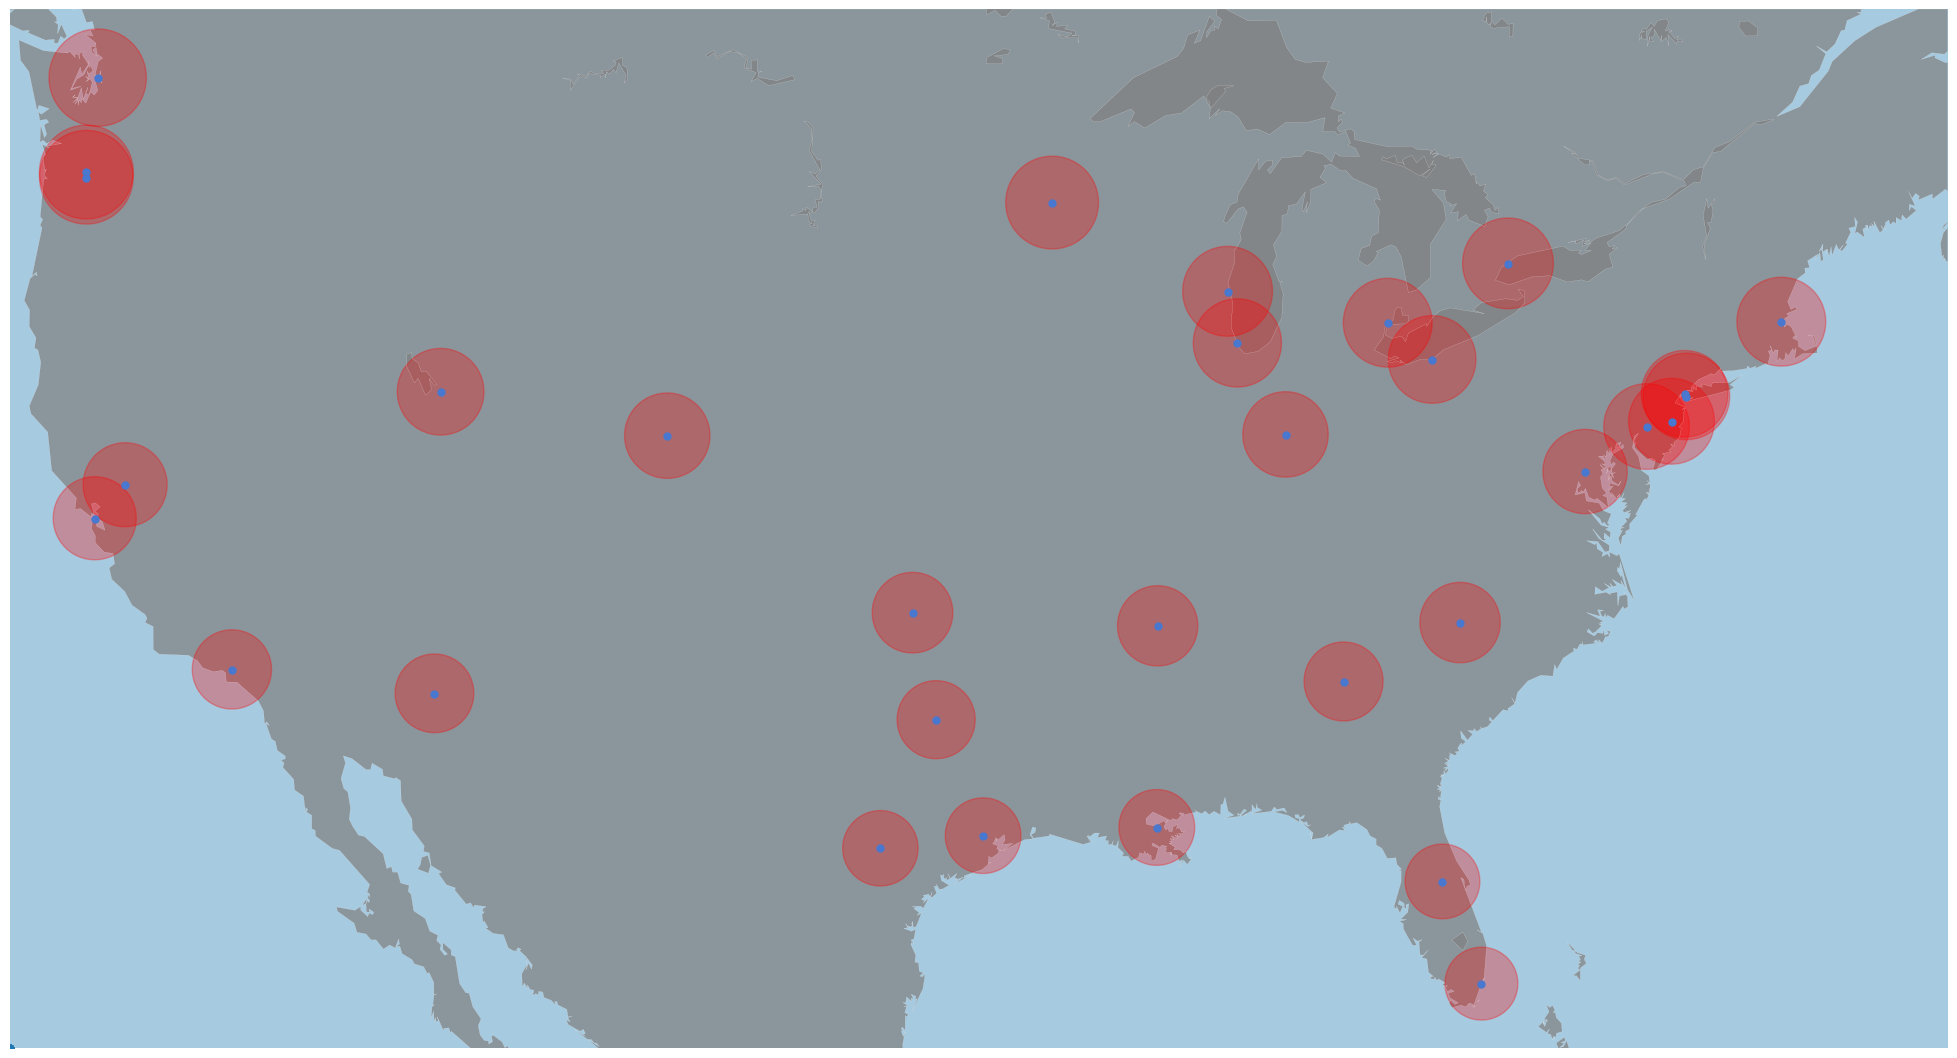

In [318]:
m = Basemap(
    projection='merc',
    llcrnrlon=-125,  # Lower left corner longitude (west)
    llcrnrlat=24,    # Lower left corner latitude
    urcrnrlon=-66,   # Upper right corner longitude (east)
    urcrnrlat=49,    # Upper right corner latitude
    resolution='l'   # Resolution: 'l' (low), 'h' (high)
)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
#s=data['n']/6, this goes in the m.scatter, its the magnitude of the dots I guess
#m.scatter(
#    x=df_cities['lon'], 
#    y=df_cities['lat'], 
#   s=20,
#    alpha=0.4, 
#    c='#1f77b4')  # Use a column of data for a colormap

num_circles = df_cities['n']
for lon, lat, num in zip(df_cities['lon'], df_cities['lat'], num_circles):
    x, y = m(lon, lat)
    m.plot(x, y, 'bo', markersize=5)  # 'bo' means blue circles, adjust markersize as needed
    m.tissot(lon, lat, num, 100, color='red', alpha=0.3)  # Draw Tissot's indicatrix

# Display the map
plt.show()

In [348]:
total_origin_players = df_teams_origin.iloc[-1:]

In [349]:
total_origin_players = total_origin_players.T

### I want to highlight the non-USA players that leaded the NBA in either pts, reb or ast.
- I will create 3 datasets containing the leaders of those categories each season
- The graphs will highlight if the leaders are non USA players

In [440]:

leaders_pts = df.loc[df.groupby('season').pts.idxmax()]
leaders_pts

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,origin
384,Michael Jordan,CHI,34.0,198.12,97.975872,North Carolina,USA,1984,1,3,...,5.9,4.3,13.4,0.042,0.132,0.331,0.567,0.208,1996-97,USA
453,Michael Jordan,CHI,35.0,198.12,97.975872,North Carolina,USA,1984,1,3,...,5.8,3.5,8.5,0.047,0.125,0.336,0.533,0.174,1997-98,USA
1015,Allen Iverson,PHI,24.0,182.88,74.842680,Georgetown,USA,1996,1,1,...,4.9,4.6,3.6,0.038,0.101,0.323,0.508,0.234,1998-99,USA
1523,Shaquille O'Neal,LAL,28.0,215.90,142.881480,Louisiana State,USA,1992,1,1,...,13.6,3.8,11.0,0.116,0.246,0.313,0.578,0.184,1999-00,USA
1961,Allen Iverson,PHI,26.0,182.88,74.842680,Georgetown,USA,1996,1,1,...,3.8,4.6,5.7,0.019,0.081,0.354,0.518,0.226,2000-01,USA
2607,Allen Iverson,PHI,27.0,182.88,74.842680,Georgetown,USA,1996,1,1,...,4.5,5.5,5.1,0.019,0.093,0.371,0.489,0.266,2001-02,USA
2847,Tracy McGrady,ORL,24.0,203.20,95.254320,NaN,USA,1997,1,9,...,6.5,5.5,3.5,0.046,0.147,0.350,0.564,0.282,2002-03,USA
3389,Tracy McGrady,ORL,25.0,203.20,95.254320,NaN,USA,1997,1,9,...,6.0,5.5,-7.1,0.039,0.131,0.330,0.526,0.272,2003-04,USA
3820,Allen Iverson,PHI,30.0,182.88,74.842680,Georgetown,USA,1996,1,1,...,4.0,7.9,0.3,0.018,0.089,0.347,0.532,0.361,2004-05,USA
4163,Kobe Bryant,LAL,27.0,198.12,99.790240,NaN,USA,1996,1,13,...,5.3,4.5,4.7,0.026,0.127,0.384,0.559,0.228,2005-06,USA


In [392]:
leaders_reb = df.loc[df.groupby('season').reb.idxmax()]

In [402]:
leaders_ast = df.loc[df.groupby('season').ast.idxmax()]

In [417]:
df.loc[df.player_name == 'Hakeem Olajuwon'].reb.mean()

8.033333333333333

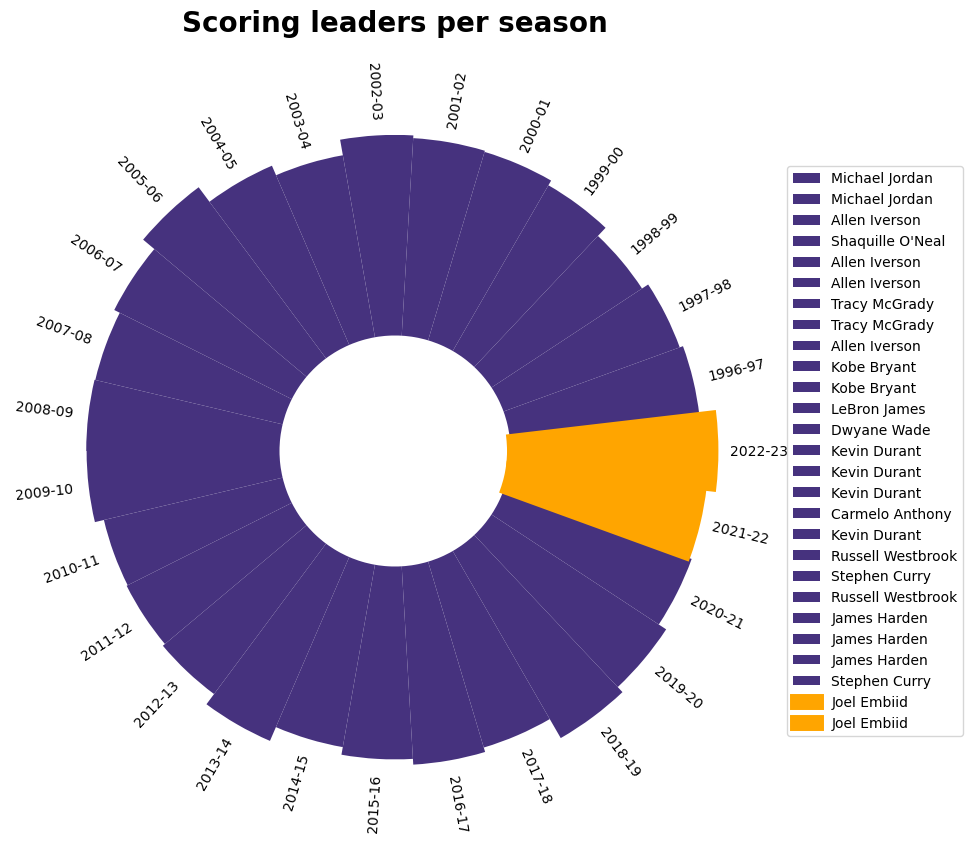

In [964]:
# Initialize plot with polar coordinates.

# set figure size
plt.figure(figsize=(14,10))
sns.set_palette('viridis')
# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = leaders_pts['pts'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * leaders_pts.pts + lowerLimit+5

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(leaders_pts.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(leaders_pts.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=leaders_pts.pts + 20, 
    width=width, 
    bottom=lowerLimit,
    linewidth=5, 
    
    label = leaders_pts.player_name,
    zorder=2)

# Set different colors based on the category
for bar, category in zip(bars, leaders_pts['origin']):

    if category == 'Other':
        bar.set_color('orange')

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, leaders_pts["season"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        )

# Move the legend to the right of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Scoring leaders per season', fontsize = 20, fontweight = 'bold')
# Add some visual enhancements
ax.set_rlabel_position(0)
ax.set_ylim(0, upperLimit)
plt.savefig('score_leaders.png',  dpi = 300) #save with transparent background

plt.show()
        
        







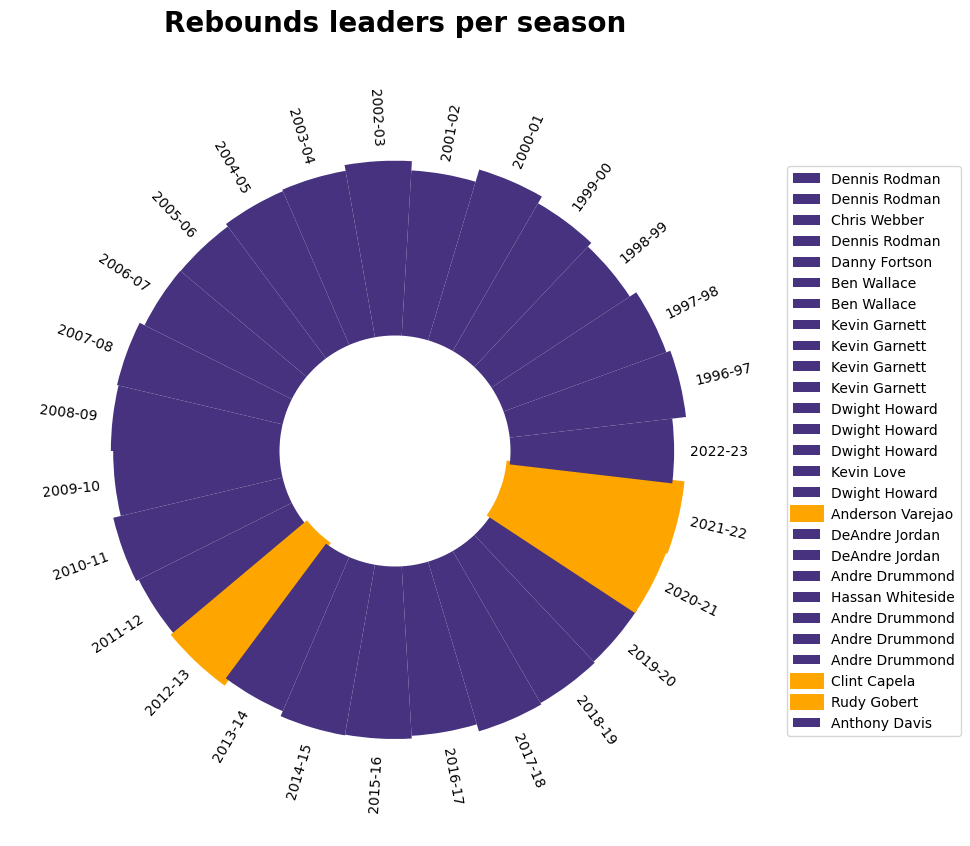

In [965]:
# set figure size
plt.figure(figsize=(14,10))
sns.set_palette('viridis')
# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = leaders_reb['reb'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * leaders_reb['reb'] + lowerLimit+5

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(leaders_reb.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(leaders_reb.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=leaders_reb['reb'] + 30, 
    width=width, 
    bottom=lowerLimit,
    linewidth=5, 
    
    label = leaders_reb.player_name,
    zorder=2)

# Set different colors based on the category
for bar, category in zip(bars, leaders_reb['origin']):

    if category == 'Other':
        bar.set_color('orange')

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, leaders_reb["season"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        )

# Move the legend to the right of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Rebounds leaders per season', fontsize = 20, fontweight = 'bold')
# Add some visual enhancements
ax.set_rlabel_position(0)
ax.set_ylim(0, upperLimit)
plt.savefig('reb_leaders.png',  dpi = 300) #save with transparent background

plt.show()
        

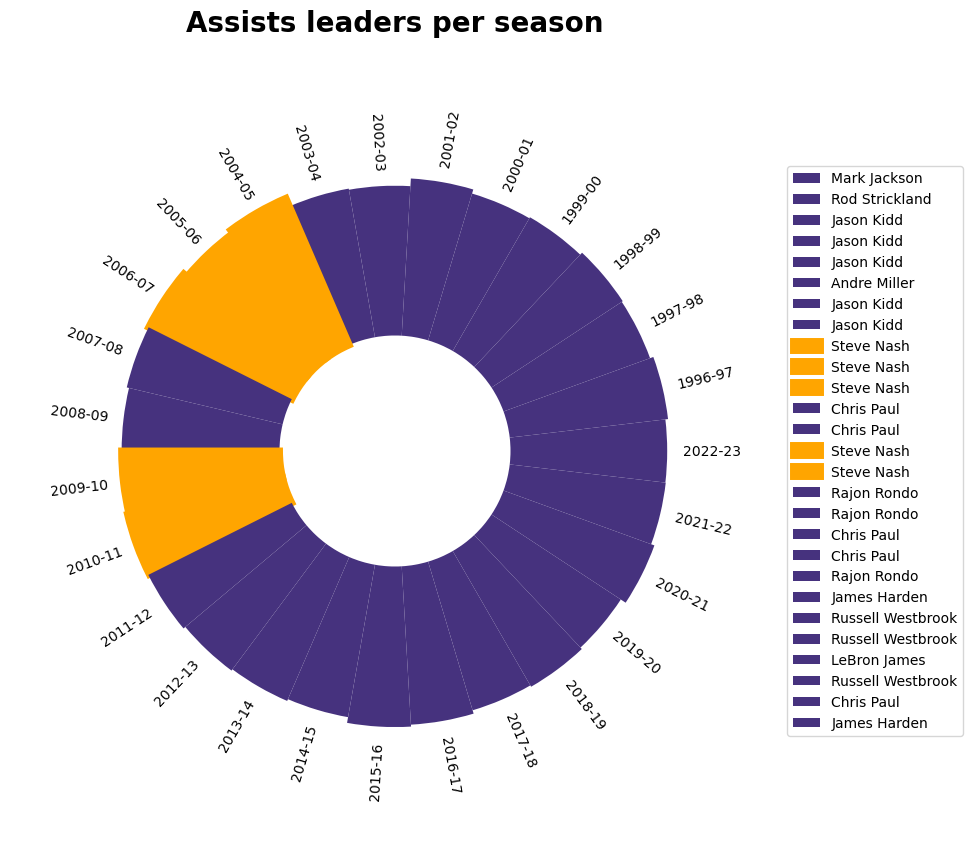

In [966]:
# set figure size
plt.figure(figsize=(14,10))
sns.set_palette('viridis')
# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = leaders_ast['ast'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * leaders_ast['ast'] + lowerLimit+5

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(leaders_ast.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(leaders_ast.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=leaders_ast['ast'] + 30, 
    width=width, 
    bottom=lowerLimit,
    linewidth=5, 
    
    label = leaders_ast.player_name,
    zorder=2)

# Set different colors based on the category
for bar, category in zip(bars, leaders_ast['origin']):

    if category == 'Other':
        bar.set_color('orange')

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, leaders_ast["season"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        )

# Move the legend to the right of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Assists leaders per season', fontsize = 20, fontweight = 'bold')
# Add some visual enhancements
ax.set_rlabel_position(0)
ax.set_ylim(0, upperLimit)
plt.savefig('ast_leaders.png',  dpi = 300) #save with transparent background

plt.show()

### Now I want to see how many non-USA players are in the top 1% of avg points but also on the top 5% of reb and assists, are there any players that meet this criteria?

In [601]:
q_points = np.quantile(df.pts, q=0.99)
q_assists = np.quantile(df.ast, q = 0.95)
q_reb = np.quantile(df.reb, q = 0.95)
top_players = df.loc[(df.pts > q_points)&(df.origin == 'Other')&(df.ast > q_assists)&(df.reb>q_reb)]
top_players
df_top_players = pd.DataFrame({
'name': ['Giannis Antetokounmpo','Luka Doncic','Nikola Jokic','NBA','NBA','NBA'],
'pts': [27.7, 28.8, 27.1,36.1,34.3,30.6],
'reb': [12.5, 9.4, 13.5,15.6,15.2,14.7],
'ast': [5.9, 8.8, 7.9,10.7,10.2,10.8]

})

### yes there are! 3 players, I will compare their stats from a season agains the best of the NBA for each category

In [967]:
top_players

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,origin
10115,Giannis Antetokounmpo,MIL,24.0,210.82,109.769264,NaN,Greece,2013,1,15,...,12.5,5.9,12.5,0.066,0.273,0.314,0.644,0.294,2018-19,Other
11092,Luka Doncic,DAL,21.0,200.66,104.326160,NaN,Slovenia,2018,1,3,...,9.4,8.8,5.3,0.036,0.224,0.355,0.585,0.454,2019-20,Other
11189,Giannis Antetokounmpo,MIL,26.0,210.82,109.769264,NaN,Greece,2013,1,15,...,11.0,5.9,9.8,0.048,0.264,0.320,0.633,0.282,2020-21,Other
11760,Giannis Antetokounmpo,MIL,27.0,210.82,109.769264,NaN,Greece,2013,1,15,...,11.6,5.8,8.0,0.060,0.267,0.340,0.633,0.304,2021-22,Other
12034,Nikola Jokic,DEN,27.0,210.82,128.820128,NaN,Serbia,2014,2,41,...,13.8,7.9,8.4,0.090,0.313,0.309,0.661,0.388,2021-22,Other
12099,Luka Doncic,DAL,23.0,200.66,104.326160,NaN,Slovenia,2018,1,3,...,9.1,8.7,3.5,0.025,0.230,0.368,0.571,0.458,2021-22,Other


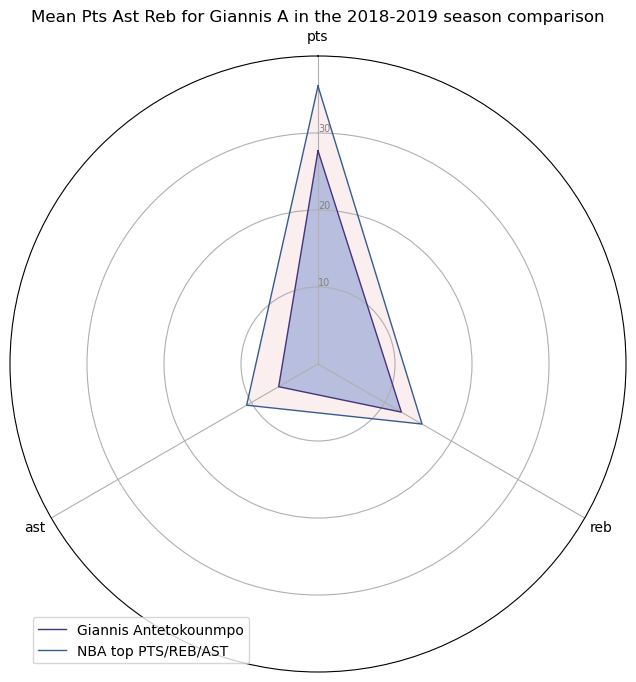

In [1016]:
 
# ------- PART 1: Create background
plt.figure(figsize=(8,8))
 
# number of variable

categories=list(df_top_players)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_top_players.loc[0].drop('name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Giannis Antetokounmpo")
ax.fill(angles, values, 'b', alpha=0.4)
 
# Ind2
values=df_top_players.loc[3].drop('name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="NBA top PTS/REB/AST")
ax.fill(angles, values, 'r', alpha=0.1)
ax.set_title('Mean Pts Ast Reb for Giannis A in the 2018-2019 season comparison')
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.4, 0.1))
plt.savefig('giannis.png',  dpi = 300) #save with transparent background

# Show the graph
plt.show()

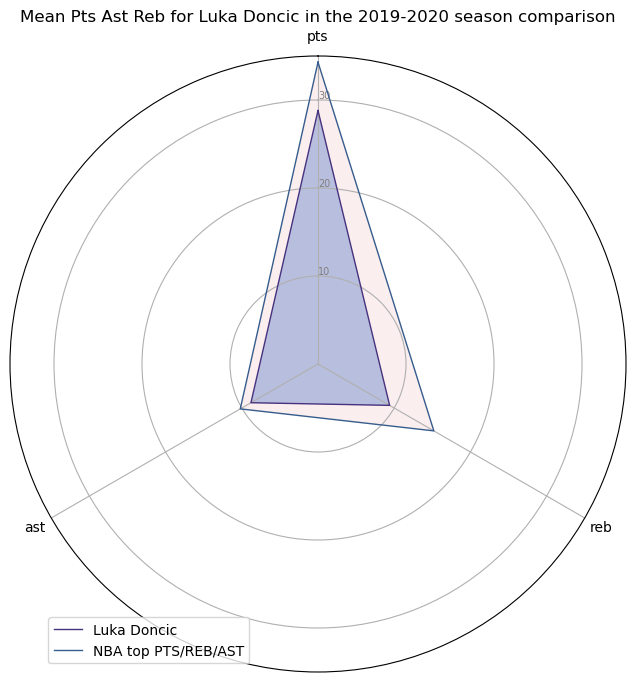

In [1014]:

# ------- PART 1: Create background
plt.figure(figsize=(8,8))
 
# number of variable

categories=list(df_top_players)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,35)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_top_players.loc[1].drop('name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Luka Doncic")
ax.fill(angles, values, 'b', alpha=0.4)
 
# Ind2
values=df_top_players.loc[4].drop('name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="NBA top PTS/REB/AST")
ax.fill(angles, values, 'r', alpha=0.1)
ax.set_title('Mean Pts Ast Reb for Luka Doncic in the 2019-2020 season comparison')

 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.4, 0.1))
plt.savefig('luka.png',  dpi = 300) #save with transparent background
# Show the graph
plt.show()

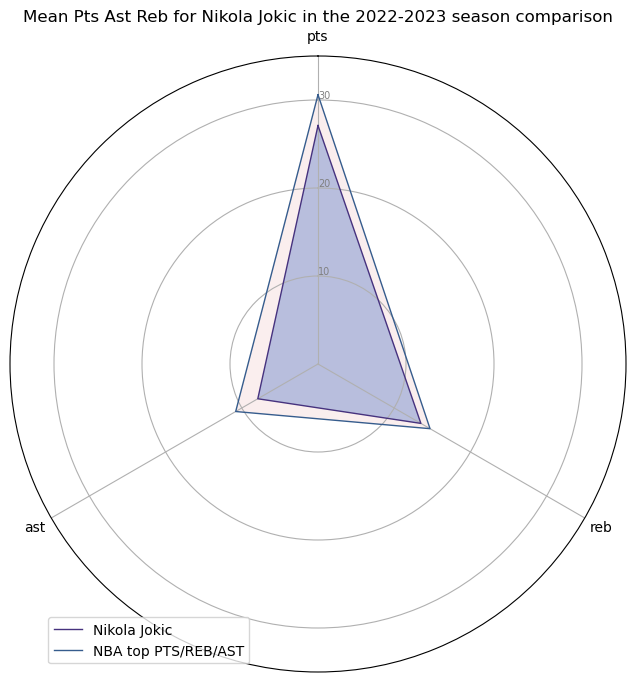

In [1015]:

# ------- PART 1: Create background
plt.figure(figsize=(8,8))
 
# number of variable

categories=list(df_top_players)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,35)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_top_players.loc[2].drop('name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Nikola Jokic")
ax.fill(angles, values, 'b', alpha=0.4)
 
# Ind2
values=df_top_players.loc[5].drop('name').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="NBA top PTS/REB/AST")
ax.fill(angles, values, 'r', alpha=0.1)
ax.set_title('Mean Pts Ast Reb for Nikola Jokic in the 2022-2023 season comparison')
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.4, 0.1))
plt.savefig('Jokic.png',  dpi = 300) #save with transparent background
# Show the graph
plt.show()

### Now I want to see if the non USA players are ''overlooked'' more often than USA players.
### To do this I will define new datasets, that contain players with a draft number bigger than 10, but that have an avg on pts, reb or ast that is on the top 1%, or 5% for ast or reb

In [689]:
#how is the scouting here?
df.draft_number = df.draft_number.replace({'Undrafted':np.nan})

In [690]:
df.draft_number = df.draft_number.astype('float')

In [697]:
draft_pts = df.loc[(df.origin == 'Other') & (df.draft_number > 10) & (df.pts >q_points)]
draft_pts

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,origin,rank_pts,rank_ast,rank_reb
10093,Giannis Antetokounmpo,MIL,23.0,210.82,100.697424,NaN,Greece,2013,1,15.0,...,0.060,0.218,0.307,0.598,0.237,2017-18,Other,4.5,40.0,14.0
10115,Giannis Antetokounmpo,MIL,24.0,210.82,109.769264,NaN,Greece,2013,1,15.0,...,0.066,0.273,0.314,0.644,0.294,2018-19,Other,3.0,27.0,6.0
10674,Giannis Antetokounmpo,MIL,25.0,210.82,109.769264,NaN,Greece,2013,1,15.0,...,0.068,0.307,0.363,0.613,0.328,2019-20,Other,5.0,29.5,3.0
11189,Giannis Antetokounmpo,MIL,26.0,210.82,109.769264,NaN,Greece,2013,1,15.0,...,0.048,0.264,0.320,0.633,0.282,2020-21,Other,5.0,29.0,8.5
11760,Giannis Antetokounmpo,MIL,27.0,210.82,109.769264,NaN,Greece,2013,1,15.0,...,0.060,0.267,0.340,0.633,0.304,2021-22,Other,3.5,30.5,7.0
12034,Nikola Jokic,DEN,27.0,210.82,128.820128,NaN,Serbia,2014,2,41.0,...,0.090,0.313,0.309,0.661,0.388,2021-22,Other,10.0,8.0,2.0
12442,Shai Gilgeous-Alexander,OKC,24.0,198.12,88.450440,Kentucky,Canada,2018,1,11.0,...,0.023,0.109,0.318,0.626,0.249,2022-23,Other,4.0,43.0,119.5
12520,Giannis Antetokounmpo,MIL,28.0,213.36,110.222856,NaN,Greece,2013,1,15.0,...,0.065,0.268,0.373,0.605,0.314,2022-23,Other,5.0,38.5,3.5


In [636]:
draft_ast = df.loc[(df.origin == 'Other') & (df.draft_number > 10) & (df.ast >q_assists)]

In [637]:
draft_reb = df.loc[(df.origin == 'Other') & (df.draft_number > 10) & (df.reb >q_reb)]

### Again, I want to make a way to visualize this. I will merge all 3 statistics into 1, a variable named Q that represents the sum of the top avg for pts reb and ast. I will separate the players into USA and non-USA

In [755]:
Q = q_assists * 2 + q_points + q_reb
q_players = mpts_player + mast_player + mreb_player
mpts_player = df.loc[df.origin == 'Other'].groupby('player_name').pts.mean()
mast_player = df.loc[df.origin == 'Other'].groupby('player_name').ast.mean()
mreb_player = df.loc[df.origin == 'Other'].groupby('player_name').reb.mean()

In [854]:

mpts_player_usa = df.loc[df.origin == 'USA'].groupby('player_name').pts.mean()
mast_player_usa = df.loc[df.origin == 'USA'].groupby('player_name').ast.mean()
mreb_player_usa = df.loc[df.origin == 'USA'].groupby('player_name').reb.mean()
q_players_usa = mpts_player_usa + mast_player_usa + mreb_player_usa

In [859]:
#df['good_draft'] = df.draft_number.apply(lambda x: 'Yes' if x < 10 else 'No') 
#q_players_usa = pd.DataFrame(q_players_usa)
#q_players_usa['draft'] = df.loc[df.origin == 'USA'].groupby('player_name').good_draft
#q_players_usa['draft'] = q_players_usa['draft'].astype('string')
#q_players_usa['draft'] = q_players_usa['draft'].apply(lambda x: 'No' if 'No' in x else 'Yes')
q_players_usa

,0,draft
player_name,,
A.C. Green,12.700000,No
A.J. Bramlett,3.800000,No
A.J. Guyton,6.066667,No
AJ Green,6.300000,No
AJ Griffin,12.000000,No
...,...,...
Zendon Hamilton,6.100000,No
Zhaire Smith,6.150000,No
Ziaire Williams,9.950000,No


In [802]:
#q_players = mast_player + mreb_player + mpts_player
#df['good_draft'] = df.draft_number.apply(lambda x: 'Yes' if x < 10 else 'No') 
#q_players = pd.DataFrame(q_players)
#q_players['draft'] = df.loc[df.origin == 'Other'].groupby('player_name').good_draft
#q_players['draft'] = q_players['draft'].astype('string')
#q_players['draft'] = q_players['draft'].apply(lambda x: 'No' if 'No' in x else 'Yes')



player_name
A.J. Lawson            5.200000
Abdel Nader            6.980000
Adam Mokoka            3.050000
Admiral Schofield      6.133333
Adonal Foyle           8.700000
                        ...    
Zeljko Rebraca         8.880000
Zhou Qi                2.250000
Zoran Dragic           2.600000
Zoran Planinic         6.266667
Zydrunas Ilgauskas    21.369231
Name: 0, Length: 413, dtype: float64

### The graphic shows the new metric, Q as a yellow area. Each player is a dot that has a radius equal to their particular stats. So, if the dot is outside the area, this player is outperforming. 
### Finally, the graph is separated between all players, and those that have a draft over 10, so the dots on the right part of the graph that are outside the yellow circle are ''overlooked players''. I do the same graph for non-USA players as well to compare

C:\Users\guine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

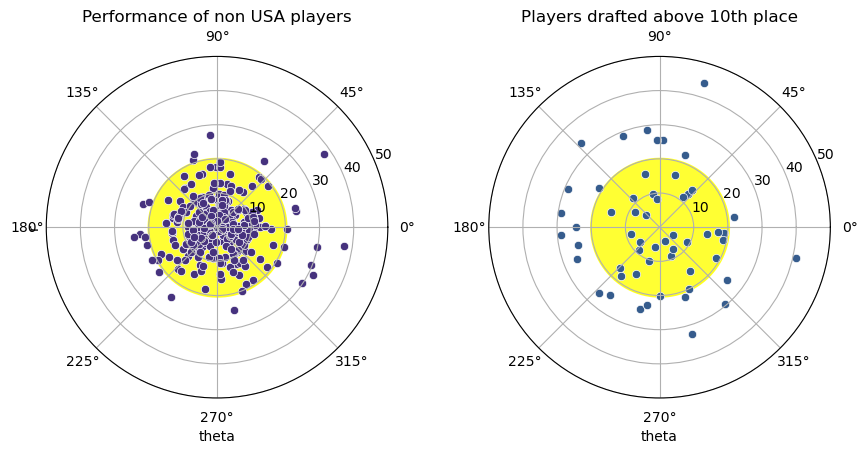

In [1010]:


plt.figure(figsize = (15,8))
# Generate an example radial datast
#r = np.linspace(0, 10, num=100)
r = q_players[0]
test1 = pd.DataFrame({'r': r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
test1 = pd.melt(test1, id_vars=['r'], var_name='speed', value_name='theta')
test1['speed'] = q_players['draft'].values
test1.rename(columns={'speed': 'Draft below 10th place?'}, inplace=True)
# Set up a grid of axes with a polar projection
g = sns.FacetGrid(test1, col="Draft below 10th place?", hue="Draft below 10th place?",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Set grid size
g.set(xlim=(0, 2 * np.pi), ylim=(0, 50), 
      )

# Draw a circle that shadows the graph
theta_circle = np.linspace(0, 2 * np.pi, 100)
radius_circle = np.ones_like(theta_circle) * q # Set the radius of the circle
g.axes[0, 0].fill_between(theta_circle, 0, radius_circle, color='yellow', alpha=0.8)
g.axes[0, 1].fill_between(theta_circle, 0, radius_circle, color='yellow', alpha=0.8)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")
g.axes[0, 0].set_title('Performance of non USA players')
g.axes[0, 1].set_title('Players drafted above 10th place')

plt.savefig('perf_nonusa.png',  dpi = 300) #save with transparent background

plt.show()

C:\Users\guine\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1700x1200 with 0 Axes>

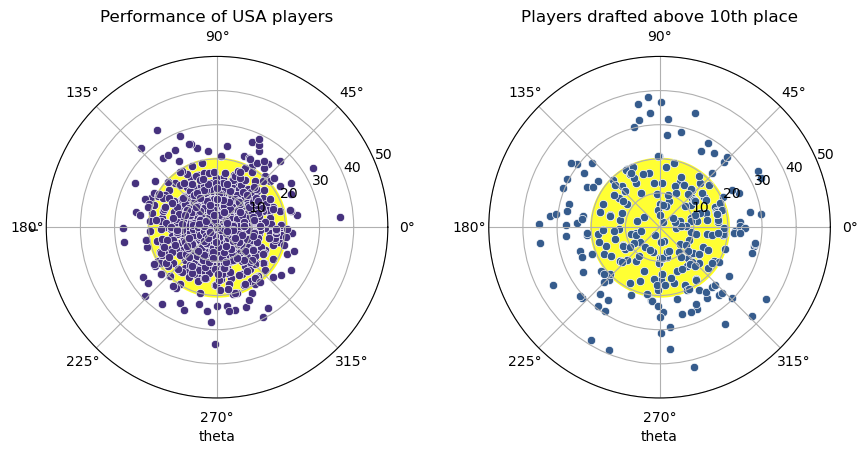

In [1009]:

plt.figure(figsize = (17,12))
# Generate an example radial datast
#r = np.linspace(0, 10, num=100)
r = q_players_usa[0]
test1 = pd.DataFrame({'r': r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
test1 = pd.melt(test1, id_vars=['r'], var_name='speed', value_name='theta')
test1['speed'] = q_players_usa['draft'].values
test1.rename(columns={'speed': 'draft below 10th place?'}, inplace=True)
# Set up a grid of axes with a polar projection
g = sns.FacetGrid(test1, col="draft below 10th place?", hue="draft below 10th place?",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Set grid size
g.set(xlim=(0, 2 * np.pi), ylim=(0, 50), 
      )

# Draw a circle that shadows the graph
theta_circle = np.linspace(0, 2 * np.pi, 100)
radius_circle = np.ones_like(theta_circle) * q # Set the radius of the circle
g.axes[0, 0].fill_between(theta_circle, 0, radius_circle, color='yellow', alpha=0.8)
g.axes[0, 1].fill_between(theta_circle, 0, radius_circle, color='yellow', alpha=0.8)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")
g.axes[0, 0].set_title('Performance of USA players')
g.axes[0, 1].set_title('Players drafted above 10th place')

plt.savefig('perf_usa.png',  dpi = 400) #save with transparent background

plt.show()

In [994]:
overlooked = q_players.loc[(q_players[0] > q) & (q_players.draft == 'No')]
overlooked_usa = q_players_usa.loc[(q_players_usa[0] > q) & (q_players_usa.draft == 'No')]

In [1003]:
len(overlooked)/len(q_players)*100

5.811138014527845

In [1004]:
len(overlooked_usa)/len(q_players_usa)*100

4.065420560747664

In [1001]:
df_overlooked = pd.DataFrame({'index':[0], '%Non USA players overlooked': '6%', '%USA players overlooked':'4%'})

In [1005]:
df_overlooked


,index,%Non USA players overlooked,%USA players overlooked
0,0,6%,4%


### Final conclusion
#### A 4% of USA players where overlooked and a 6% of non-USA were also. Although there are some big mistakes (Shai, Giannis, etc) you can see that in general the scouting of the NBA works pretty well. Also, there does not seem to be a bias towars non-USA players, there are selected in good positions if they are perceived well.